<a href="https://colab.research.google.com/github/Omarnot2far/Python_Data_analysis-ML/blob/main/clustering_customer_segmetation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

This dataset consist of customer information, their income and spending score. In this notebook I am tring to find out customer segmentation or different group of customer based on whose spending score and annual income is simiral. 

In [ ]:
# import the data set
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In order to checking the customer segmentaion we need to see the Annual Income and Spending Score columns to find out different segmentaion.

**keeping the Annual Income and Spending Score columns**

In [ ]:
# keeping the values of column number 3 and 4
x = df.iloc[:,[3,4]].values



In [ ]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
# finding wcss value for different number of clusters
#wcss = WCSS is defined as the sum of the squared distance 
#between each member of the cluster and its centroid. use distortion instead

Distortion = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init= "k-means++", random_state= 42 )
  kmeans.fit(x)
  Distortion.append(kmeans.inertia_)

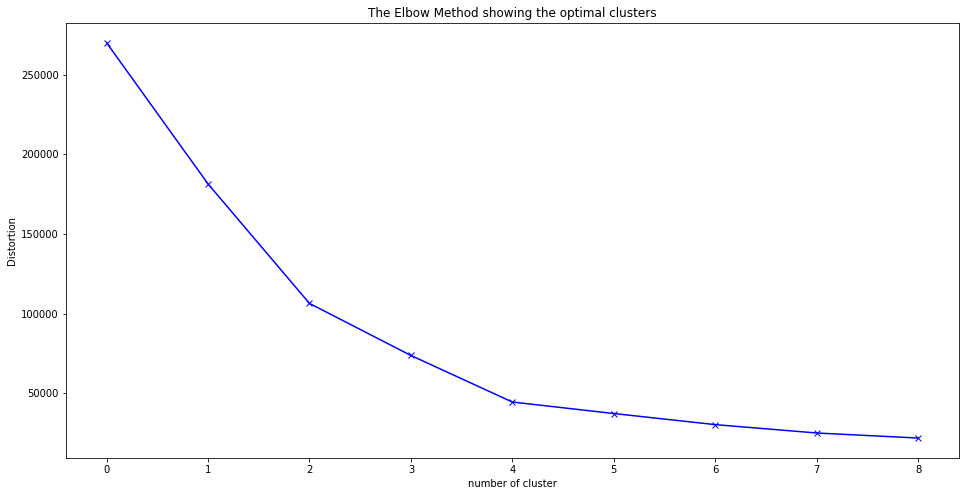

In [ ]:
# create a elbow graph 
plt.figure(figsize=(16,8))
plt.plot(Distortion, 'bx-')
plt.xlabel('number of cluster')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[ 48.1       ,  52.675     ],
       [ 80.18181818,  12.68181818],
       [ 24.58333333,   9.58333333],
       [108.18181818,  82.72727273],
       [ 30.        ,  34.61538462],
       [ 25.0952381 ,  80.04761905],
       [ 63.72093023,  46.1627907 ],
       [ 78.03571429,  81.89285714],
       [109.7       ,  22.        ]])

In [ ]:
kmeans_model = KMeans(n_clusters= 5, init= "k-means++", random_state= 42 )
kmeans_predict = kmeans_model.fit_predict(x)

In [ ]:
df['Cluster'] = kmeans_predict
df


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


In [ ]:
# No of Groups of clusters 
df['Cluster'].value_counts()

0    81
4    39
1    35
2    23
3    22
Name: Cluster, dtype: int64

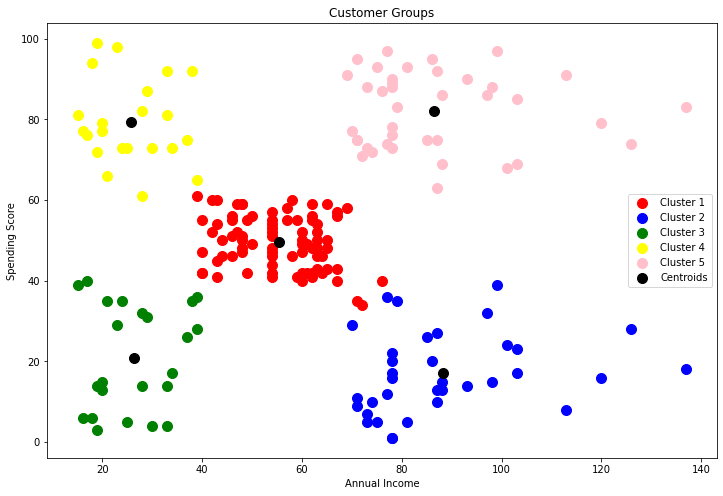

In [ ]:
#visualize

plt.figure(figsize=(12,8))
plt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[kmeans_predict == 3, 0], x[kmeans_predict == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(x[kmeans_predict == 4, 0], x[kmeans_predict == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')


#Plotting the centroids of the clusters

plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()